Мохляков П.А. \
М8О-408Б-19 \
Вариант 3

## Лабораторная работа 1
### Персептрон Розенблатта

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
X_train = np.array([[-2.8, -0.1],
                    [4, 0.7],
                    [3.4, 2.3],
                    [0.8, -2.6],
                    [1.6, -4.2],
                    [1.2, 1.6]
                    ])
y_train = np.array([1, 0, 0, 1, 1, 1])

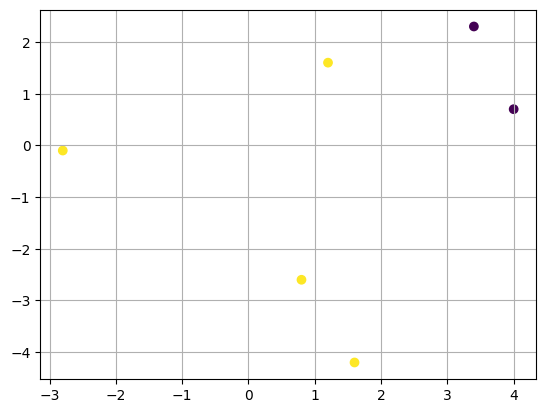

In [7]:
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],c = y_train)

In [8]:
perceptron = keras.Sequential([
        layers.Dense(1,input_dim=2, activation="sigmoid", name="sigmoid"),
    ]
)
opt = keras.optimizers.Adam(learning_rate=0.1)
perceptron.compile(loss='mse', optimizer=opt, metrics=['mae'])

2022-10-04 22:23:11.924225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-04 22:23:11.924639: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-04 22:23:11.924690: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PC): /proc/driver/nvidia/version does not exist
2022-10-04 22:23:11.925559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
perceptron.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 0.4592 - mae: 0.6481
Epoch 2/50
6/6 [==============================] - 0s 997us/step - loss: 0.2486 - mae: 0.4340
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1713 - mae: 0.3435
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0945 - mae: 0.2408
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0904 - mae: 0.2328
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0826 - mae: 0.2106
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0793 - mae: 0.2036
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0714 - mae: 0.1943
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0633 - mae: 0.1862
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0621 - mae: 0.1796
Epoch 11/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0528 - mae: 0.

In [10]:
weights = perceptron.layers[0].get_weights()

In [11]:
discriminant_line = lambda x: (weights[0][0]*x  + weights[1][0]) / -weights[0][1]

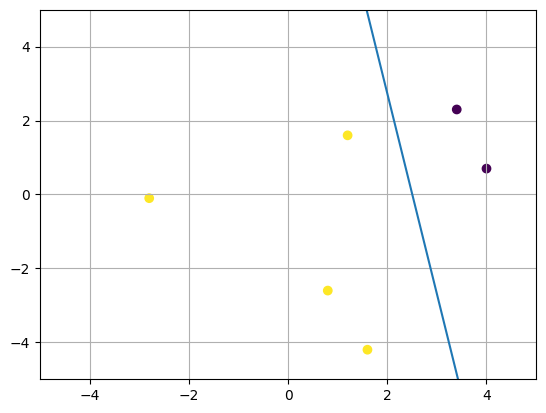

In [12]:
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],c = y_train)
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot([-6,6], [discriminant_line(-6),discriminant_line(6)])

Классификация рандомных точек

In [14]:
rand_x = np.random.rand(30,2)*10-5
pred_rand = [int(p[0] > 0.5) for p in perceptron.predict(rand_x)]

1/1 [==============================] - 0s 136ms/step


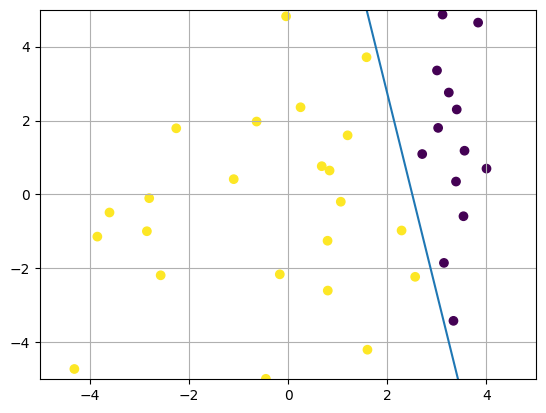

In [16]:
plt.grid()
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],c = y_train)
plt.scatter([x[0] for x in rand_x], [x[1] for x in rand_x],c = pred_rand)
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot([-6,6], [discriminant_line(-6),discriminant_line(6)])

### Линейно неразделимое множество

In [17]:
non_lin_x = np.random.rand(300,2)*10-5
non_lin_y = np.array([int(-2.5 < x[0] < 2.5 and -2.5 < x[1] < 2.5) for x in non_lin_x])

(-5.0, 5.0)

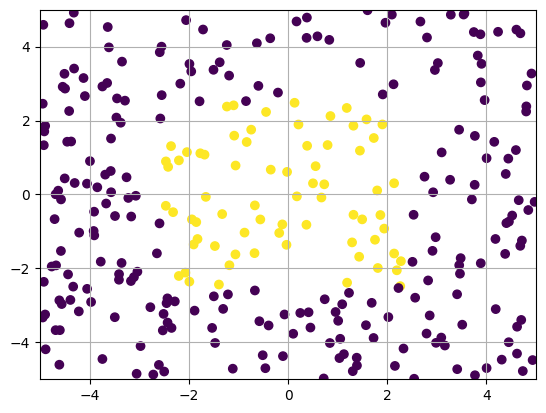

In [18]:
plt.grid()
plt.scatter([x[0] for x in non_lin_x], [x[1] for x in non_lin_x],c = non_lin_y)
plt.ylim(-5,5)
plt.xlim(-5,5)

In [19]:
perceptron_non_lin = keras.Sequential([
        layers.Dense(1,input_dim=2, activation="sigmoid", name="sigmoid"),
    ]
)
opt = keras.optimizers.Adam(learning_rate=0.1)
perceptron_non_lin.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [21]:
perceptron_non_lin.fit(non_lin_x, non_lin_y, batch_size=50, epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1899 - mae: 0.3063
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1897 - mae: 0.3059
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1890 - mae: 0.3084
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1872 - mae: 0.3120
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1849 - mae: 0.3158
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1832 - mae: 0.3208
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1820 - mae: 0.3274
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1806 - mae: 0.3335
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1797 - mae: 0.3387
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1794 - mae: 0.3445
Epoch 11/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1788 - mae: 0.34

In [22]:
weights = perceptron.layers[0].get_weights()
discriminant_line = lambda x: (weights[0][0]*x  + weights[1][0]) / -weights[0][1]

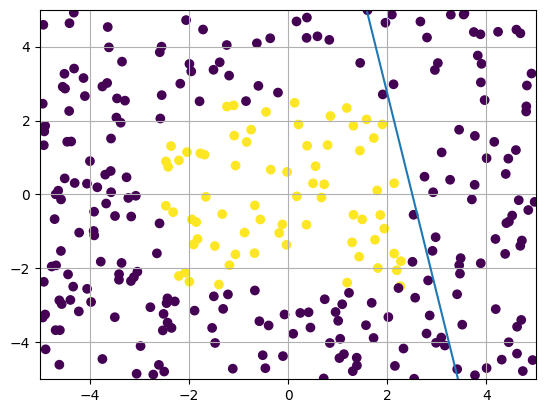

In [23]:
plt.grid()
plt.scatter([x[0] for x in non_lin_x], [x[1] for x in non_lin_x],c = non_lin_y)
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot([-6,6], [discriminant_line(-6),discriminant_line(6)])

### 4 линейноразделимых класса

In [24]:
X_four_train = np.array([[-1.8, -0.5], [2.1, 3.8], [2.2, -4.9], [1.7, -0.7],[-0.7, 3.9], [3.1, -1.8], [-2.6, -1.6], [-1.3, 0.4]])
y_four_train = np.array([[0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [0, 0]])

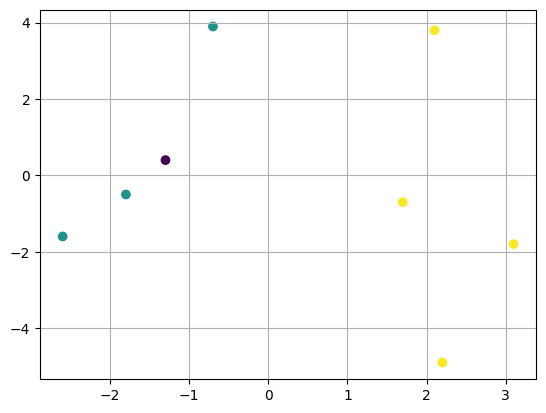

In [25]:
plt.grid()
plt.scatter([x[0] for x in X_four_train ], [x[1] for x in X_four_train ],c = [y[0]*2 + y[1] for y in y_four_train])

In [26]:
perceptron_four_classes = keras.Sequential([
        layers.Dense(2,input_dim=2, activation="sigmoid", name="sigmoid"),
    ]
)
opt = keras.optimizers.Adam(learning_rate=0.1)
perceptron_four_classes.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [27]:
perceptron_four_classes.fit(X_four_train, y_four_train, batch_size=1, epochs=50)

Epoch 1/50
8/8 [==============================] - 0s 919us/step - loss: 0.0970 - mae: 0.2143
Epoch 2/50
8/8 [==============================] - 0s 965us/step - loss: 0.0485 - mae: 0.1215
Epoch 3/50
8/8 [==============================] - 0s 836us/step - loss: 0.0476 - mae: 0.1086
Epoch 4/50
8/8 [==============================] - 0s 903us/step - loss: 0.0486 - mae: 0.1089
Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 0.0428 - mae: 0.0999
Epoch 6/50
8/8 [==============================] - 0s 926us/step - loss: 0.0414 - mae: 0.1011
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 0.0404 - mae: 0.1057
Epoch 8/50
8/8 [==============================] - 0s 904us/step - loss: 0.0406 - mae: 0.1050
Epoch 9/50
8/8 [==============================] - 0s 963us/step - loss: 0.0409 - mae: 0.1047
Epoch 10/50
8/8 [==============================] - 0s 931us/step - loss: 0.0414 - mae: 0.1030
Epoch 11/50
8/8 [==============================] - 0s 932us/step - loss: 

In [35]:
weights = perceptron_four_classes.layers[0].get_weights()
print(weights)
discriminant_line1 = lambda x: (weights[0][0][0]*x  + weights[1][0]) / -weights[0][1][0]
discriminant_line2 = lambda x: (weights[0][0][1]*x  + weights[1][1]) / -weights[0][1][1]

[array([[ 3.052627  , -2.141867  ],
       [-0.39860046,  0.65212053]], dtype=float32), array([-0.5570522, -2.7410908], dtype=float32)]


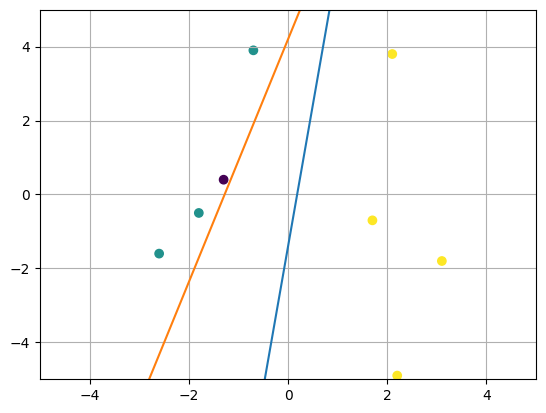

In [36]:
plt.grid()
plt.scatter([x[0] for x in X_four_train ], [x[1] for x in X_four_train ],c = [y[0]*2 + y[1] for y in y_four_train])
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.plot([-6, 6], [discriminant_line1(-6), discriminant_line1(6)])
plt.plot([-6, 6], [discriminant_line2(-6), discriminant_line2(6)])

In [38]:
rand_x = np.random.rand(300,2)*10-5
pred_rand = [[int(p[0] > 0.5),int(p[1] > 0.5)] for p in perceptron_four_classes.predict(rand_x)]

10/10 [==============================] - 0s 759us/step


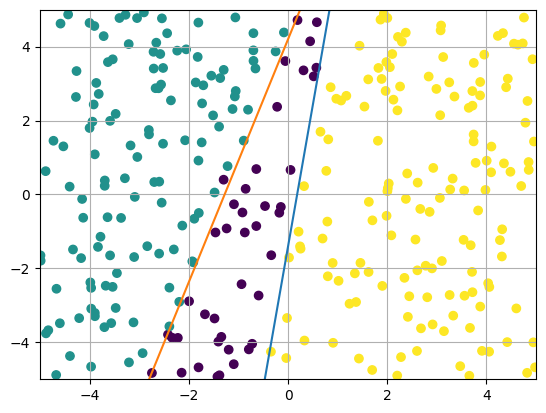

In [39]:
plt.grid()
plt.scatter([x[0] for x in X_four_train], [x[1] for x in X_four_train],c = [y[0]*2 + y[1] for y in y_four_train])
plt.scatter([x[0] for x in rand_x], [x[1] for x in rand_x],c = [y[0]*2 + y[1] for y in pred_rand])
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.plot([-6, 6], [discriminant_line1(-6), discriminant_line1(6)])
plt.plot([-6, 6], [discriminant_line2(-6), discriminant_line2(6)])